# I will try to reduce data dimensionality using PCA on our predictors.

In [1]:
# Import the necessary libraries 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns

In [2]:

# Read train features
train_aug = pd.read_csv("../Data/train_labels_augmented.csv")
train_aug


,sample_id,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,...,3_ratio_peak_abund,3_ratio_meanstd_abund,4_ratio,4_ratio_peak_temp,4_ratio_peak_abund,4_ratio_meanstd_abund,5_ratio,5_ratio_peak_temp,5_ratio_peak_abund,5_ratio_meanstd_abund
0,S0000,0,0,0,0,0,0,0,0,1,...,0.024563,0.009736,28.0,35.420,0.010877,0.009101,19.0,105.458,0.006600,0.002841
1,S0001,0,1,0,0,0,0,0,0,0,...,0.033209,0.024006,16.0,497.404,0.093082,0.020585,18.0,-60.370,0.030234,0.019214
2,S0002,0,0,0,0,0,1,0,0,0,...,0.294738,0.075850,16.0,545.304,0.040446,0.013012,1.0,145.673,0.004003,0.001801
3,S0003,0,1,0,1,0,0,0,0,1,...,0.260027,0.061956,28.0,593.222,0.081701,0.031606,16.0,593.222,0.083077,0.028375
4,S0004,0,0,0,1,0,1,1,0,0,...,0.238290,0.082294,16.0,471.733,0.084732,0.026218,44.0,333.273,0.029998,0.013378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,S0749,0,0,0,0,0,0,0,0,0,...,0.270481,0.187613,28.0,523.057,0.130122,0.079981,16.0,228.295,0.082464,0.057972
750,S0750,0,0,0,0,0,0,1,0,0,...,0.403334,0.152057,32.0,906.311,0.158759,0.122547,16.0,664.846,0.079410,0.041182
751,S0751,0,0,0,0,0,0,0,1,0,...,0.261788,0.143669,28.0,-60.026,0.065964,0.068941,32.0,96.019,0.032240,0.019636
752,S0752,0,0,0,1,0,0,0,0,0,...,0.086638,0.051900,1.0,259.552,0.029574,0.018446,36.0,489.092,0.027185,0.016657


### Now we make a dataframe with just the predictors (columns after the ions).

In [4]:
predictors = pd.DataFrame(train_aug.iloc[:,12:])
predictors

,1_ratio_peak_temp,1_ratio_peak_abund,1_ratio_meanstd_abund,2_ratio,2_ratio_peak_temp,2_ratio_peak_abund,2_ratio_meanstd_abund,3_ratio,3_ratio_peak_temp,3_ratio_peak_abund,3_ratio_meanstd_abund,4_ratio,4_ratio_peak_temp,4_ratio_peak_abund,4_ratio_meanstd_abund,5_ratio,5_ratio_peak_temp,5_ratio_peak_abund,5_ratio_meanstd_abund
0,103.666,1.0,0.380121,17.0,103.666,0.276675,0.105220,16.0,103.666,0.024563,0.009736,28.0,35.420,0.010877,0.009101,19.0,105.458,0.006600,0.002841
1,497.404,1.0,0.218379,2.0,-60.370,0.061658,0.028689,32.0,-60.370,0.033209,0.024006,16.0,497.404,0.093082,0.020585,18.0,-60.370,0.030234,0.019214
2,145.673,1.0,0.344421,17.0,145.673,0.254002,0.087770,32.0,545.304,0.294738,0.075850,16.0,545.304,0.040446,0.013012,1.0,145.673,0.004003,0.001801
3,120.720,1.0,0.237834,44.0,593.222,0.485557,0.147348,17.0,120.720,0.260027,0.061956,28.0,593.222,0.081701,0.031606,16.0,593.222,0.083077,0.028375
4,142.874,1.0,0.344214,32.0,471.733,0.595652,0.164283,17.0,142.874,0.238290,0.082294,16.0,471.733,0.084732,0.026218,44.0,333.273,0.029998,0.013378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,218.772,1.0,0.718671,32.0,215.580,0.347087,0.223001,17.0,234.619,0.270481,0.187613,28.0,523.057,0.130122,0.079981,16.0,228.295,0.082464,0.057972
750,887.853,1.0,0.660303,17.0,887.853,0.235633,0.155442,44.0,671.071,0.403334,0.152057,32.0,906.311,0.158759,0.122547,16.0,664.846,0.079410,0.041182
751,120.692,1.0,0.545147,2.0,138.724,0.691257,0.397537,17.0,120.692,0.261788,0.143669,28.0,-60.026,0.065964,0.068941,32.0,96.019,0.032240,0.019636
752,237.033,1.0,0.460473,17.0,240.306,0.234069,0.107455,32.0,262.770,0.086638,0.051900,1.0,259.552,0.029574,0.018446,36.0,489.092,0.027185,0.016657


### Scale the data.

In [5]:
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(predictors)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.996509,0.232693,-0.576226,-0.652710,-1.058138,-0.555602,-0.775977,-0.680316,-1.013790,-1.173075,-1.146119,0.329976,-1.453325,-1.040582,-0.857183,-0.158866,-1.261897,-0.794948,-0.780862
1,0.432168,0.232693,-1.323799,-2.103889,-1.650751,-1.366699,-1.318999,0.651610,-1.557930,-1.125760,-1.007788,-0.412531,0.156053,-0.416602,-0.717853,-0.218313,-1.858173,-0.596517,-0.539146
2,-0.844087,0.232693,-0.741229,-0.652710,-0.906379,-0.641131,-0.899792,0.651610,0.451210,0.305470,-0.505226,-0.412531,0.322918,-0.816134,-0.809733,-1.228905,-1.117294,-0.816747,-0.796219
3,-0.934629,0.232693,-1.233876,1.959412,0.710482,0.232352,-0.477054,-0.597070,-0.957219,0.115509,-0.639910,0.329976,0.489846,-0.502990,-0.584145,-0.337206,0.491980,-0.152859,-0.403909
4,-0.854243,0.232693,-0.742190,0.798469,0.271579,0.647660,-0.356892,-0.597070,-0.883730,-0.003446,-0.442764,-0.412531,0.066625,-0.479985,-0.649516,1.327299,-0.442732,-0.598501,-0.625314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,-0.578847,0.232693,0.988556,0.798469,-0.653826,-0.289989,0.059738,-0.597070,-0.579394,0.172719,0.578181,0.329976,0.245418,-0.135457,0.002748,-0.337206,-0.820206,-0.158004,0.033019
750,1.848911,0.232693,0.718779,-0.652710,1.774896,-0.710421,-0.419627,1.650555,0.868403,0.899766,0.233506,0.577478,1.580530,0.081912,0.519171,-0.337206,0.749521,-0.183644,-0.214850
751,-0.934730,0.232693,0.186526,-2.103889,-0.931484,1.008305,1.298154,-0.597070,-0.957312,0.125146,0.152197,0.329976,-1.785822,-0.622442,-0.131189,0.613940,-1.295837,-0.579673,-0.532929
752,-0.512587,0.232693,-0.204838,-0.652710,-0.564498,-0.716324,-0.760114,0.651610,-0.486011,-0.833369,-0.737398,-1.340665,-0.672534,-0.898660,-0.743809,0.851726,0.117554,-0.622118,-0.576894


### Check the correlation between features without PCA

<Axes: >

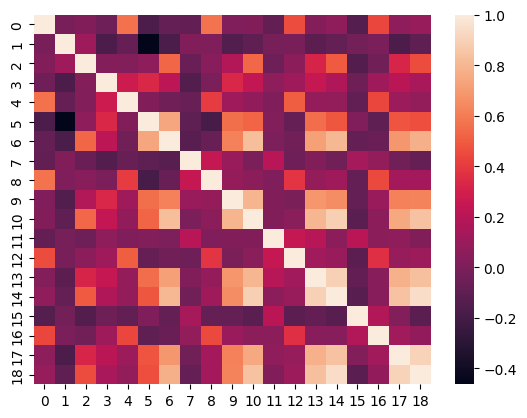

In [6]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

## Applying PCA

In [7]:
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.829088,-2.324712,-0.345924
1,-3.072377,-1.558945,-1.177093
2,-2.006145,-0.676194,-0.617842
3,-0.855221,0.014008,1.703809
4,-1.129327,-0.950682,1.341090


### Checking correlation between features after PCA

<Axes: >

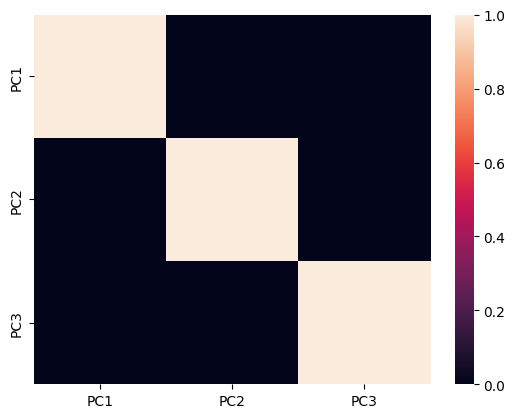

In [8]:
sns.heatmap(data_pca.corr())

### The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.

### Now we might wonder if reducing to 3 predictors was too small. Let's examine 4 predictors.

In [10]:
#Taking no. of Principal Components as 4
pca = PCA(n_components = 4)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4'])
data_pca.head()

,PC1,PC2,PC3,PC4
0,-2.829088,-2.324708,-0.345891,-0.213757
1,-3.072377,-1.558946,-1.177107,0.673630
2,-2.006145,-0.676195,-0.617845,0.070025
3,-0.855221,0.014005,1.703829,-1.217963
4,-1.129327,-0.950683,1.341077,-0.664438


<Axes: >

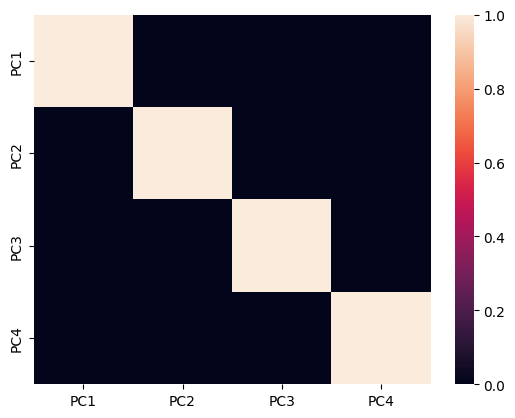

In [11]:
sns.heatmap(data_pca.corr())

### Now we might wonder if reducing to 4 predictors is still too small. Let's examine 5 predictors.

In [12]:
#Taking no. of Principal Components as 5
pca = PCA(n_components = 5)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.829088,-2.324708,-0.345895,-0.213754,-0.377937
1,-3.072377,-1.558946,-1.177107,0.673644,0.346529
2,-2.006145,-0.676195,-0.617849,0.070018,0.633060
3,-0.855221,0.014006,1.703821,-1.217956,-1.257022
4,-1.129327,-0.950683,1.341080,-0.664445,-0.531055


<Axes: >

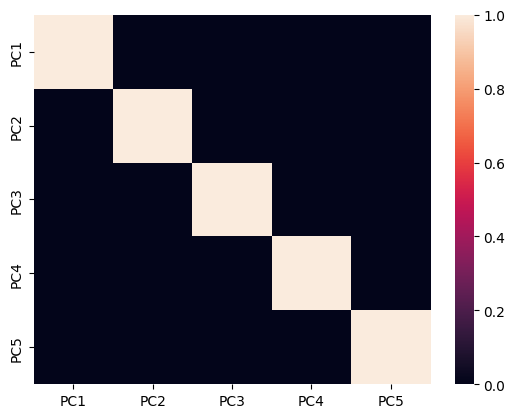

In [13]:
sns.heatmap(data_pca.corr())

### Now 6.

In [14]:
#Taking no. of Principal Components as 6
pca = PCA(n_components = 6)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908369


<Axes: >

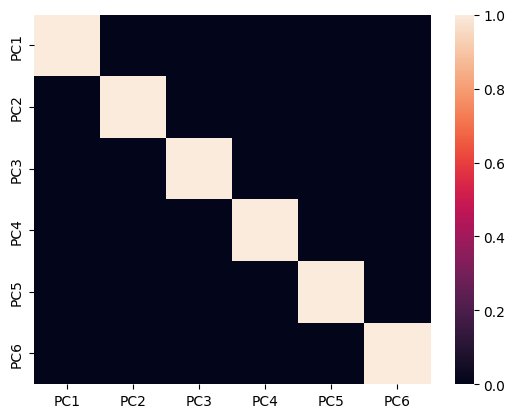

In [15]:
sns.heatmap(data_pca.corr())

### Now 7.

In [16]:
#Taking no. of Principal Components as 7
pca = PCA(n_components = 7)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737,0.423986
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592,1.613577
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474,-0.162597
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697,-1.485070
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908368,-0.739127


<Axes: >

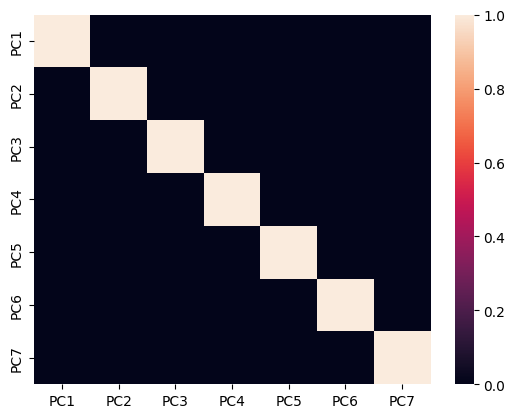

In [17]:
sns.heatmap(data_pca.corr())

### Now 8.

In [18]:
#Taking no. of Principal Components as 8
pca = PCA(n_components = 8)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737,0.423986,-0.451827
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592,1.613577,-1.516687
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474,-0.162597,-0.481326
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697,-1.485070,-0.602297
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908368,-0.739128,-0.125028


<Axes: >

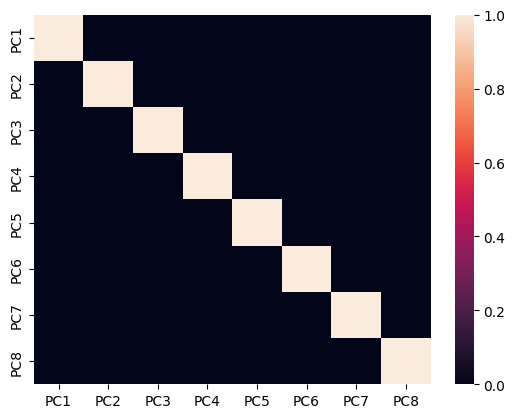

In [19]:
sns.heatmap(data_pca.corr())

### Now 9.

In [20]:
#Taking no. of Principal Components as 9
pca = PCA(n_components = 9)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737,0.423986,-0.451827,0.464481
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592,1.613577,-1.516687,-0.306197
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474,-0.162597,-0.481326,-0.011442
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697,-1.485070,-0.602297,0.099964
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908368,-0.739128,-0.125028,-0.506791


<Axes: >

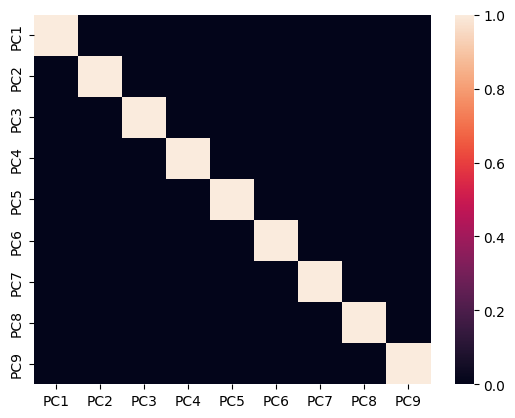

In [21]:
sns.heatmap(data_pca.corr())

### Now 10.

In [22]:
#Taking no. of Principal Components as 10
pca = PCA(n_components = 10)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737,0.423986,-0.451827,0.464481,-0.138495
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592,1.613577,-1.516687,-0.306197,-0.407094
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474,-0.162597,-0.481326,-0.011442,0.288829
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697,-1.485070,-0.602297,0.099964,0.480038
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908368,-0.739128,-0.125028,-0.506791,-0.645201


<Axes: >

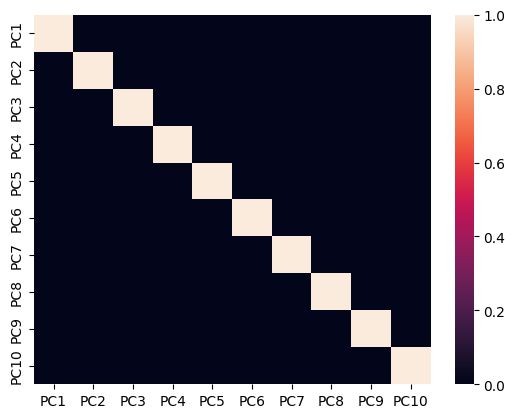

In [23]:
sns.heatmap(data_pca.corr())

### Now 11.

In [24]:
#Taking no. of Principal Components as 11
pca = PCA(n_components = 11)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737,0.423986,-0.451827,0.464481,-0.138495,-0.491756
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592,1.613577,-1.516687,-0.306197,-0.407094,0.965064
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474,-0.162597,-0.481326,-0.011442,0.288829,0.475028
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697,-1.485070,-0.602297,0.099964,0.480038,0.587688
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908368,-0.739128,-0.125028,-0.506791,-0.645201,0.559408


<Axes: >

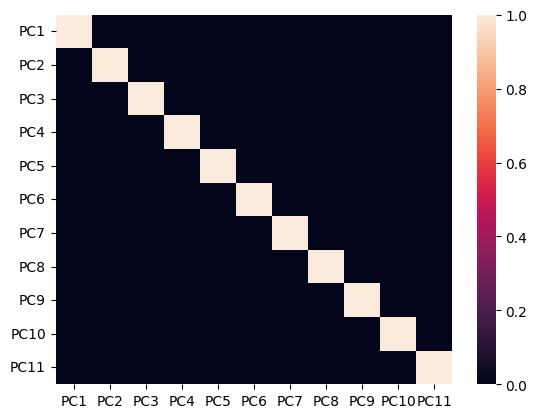

In [25]:
sns.heatmap(data_pca.corr())

### Not sure what's happening here.

### I guess we'll try all 18 and see if we still have all black.

In [26]:
#Taking no. of Principal Components as 18
pca = PCA(n_components = 18)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','Pc13','PC14','Pc15', 'Pc16','PC17','Pc18'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Pc13,PC14,Pc15,Pc16,PC17,Pc18
0,-2.829088,-2.324708,-0.345893,-0.213759,-0.377917,-0.043737,0.423986,-0.451827,0.464481,-0.138495,-0.491756,0.377696,-0.331980,-0.180138,-0.158198,0.065241,-0.081405,-0.109674
1,-3.072377,-1.558947,-1.177104,0.673633,0.346572,-0.756592,1.613577,-1.516687,-0.306197,-0.407094,0.965064,0.333193,0.941275,1.175719,0.018409,0.006356,0.111080,0.127291
2,-2.006145,-0.676195,-0.617850,0.070020,0.633048,-1.804474,-0.162597,-0.481326,-0.011442,0.288829,0.475028,-0.587447,0.619855,-0.741857,-0.201650,-0.031799,0.008566,-0.031605
3,-0.855221,0.014006,1.703824,-1.217967,-1.256979,-0.186697,-1.485070,-0.602297,0.099964,0.480038,0.587688,0.205388,-0.342785,-0.086980,-0.383885,0.120572,0.008199,-0.200943
4,-1.129327,-0.950683,1.341078,-0.664438,-0.531084,0.908368,-0.739128,-0.125028,-0.506791,-0.645201,0.559408,-0.479235,0.133913,-0.267900,0.134655,0.000509,-0.195971,-0.083770


<Axes: >

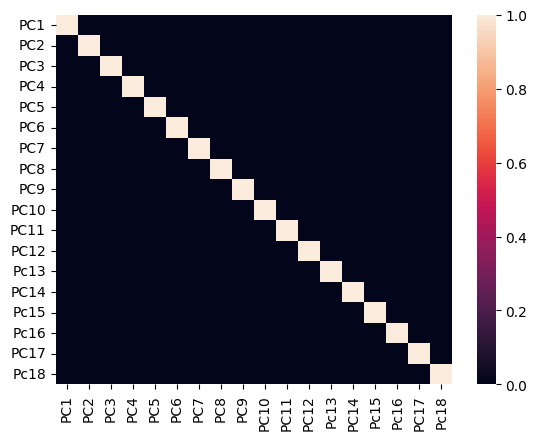

In [27]:
sns.heatmap(data_pca.corr())

### Well something must have gone wrong.